Dimensiones: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



--- ¿Hay datos nulos? ---
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

--- Tipos de datos ---
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


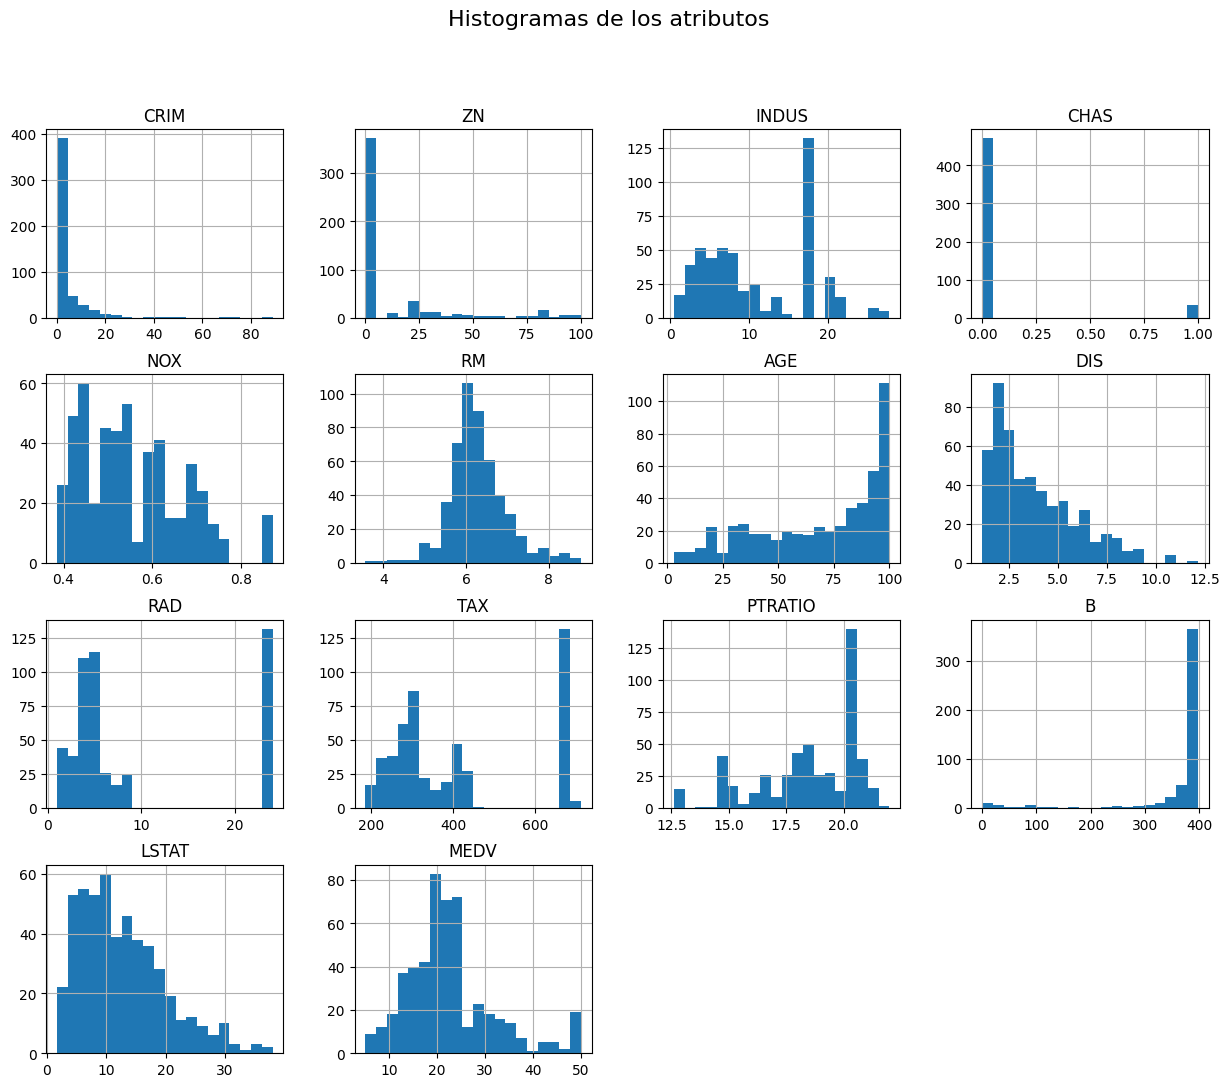

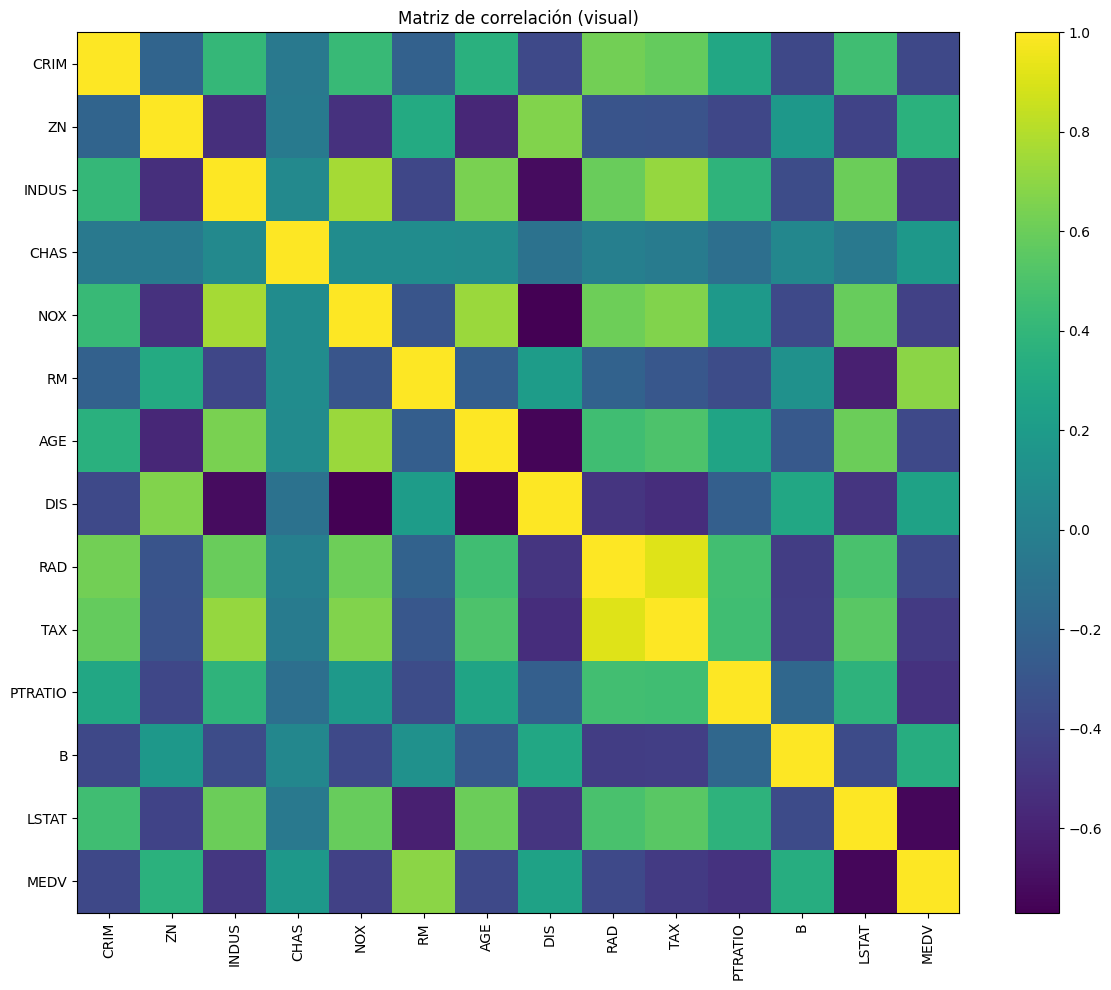


--- Correlación con MEDV ---


,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321



Tamaños -> Train:303, Val:101, Test:102

Linear Regression (sin normalizar) - VAL
R2 = 0.7151, RMSE = 4.7292

Linear Regression (normalizado MinMax) - VAL
R2 = 0.7151, RMSE = 4.7292

--- MÉTRICAS EN TEST ---
Sin normalizar -> R2=0.6688, RMSE=4.9286
Normalizado     -> R2=0.6688, RMSE=4.9286


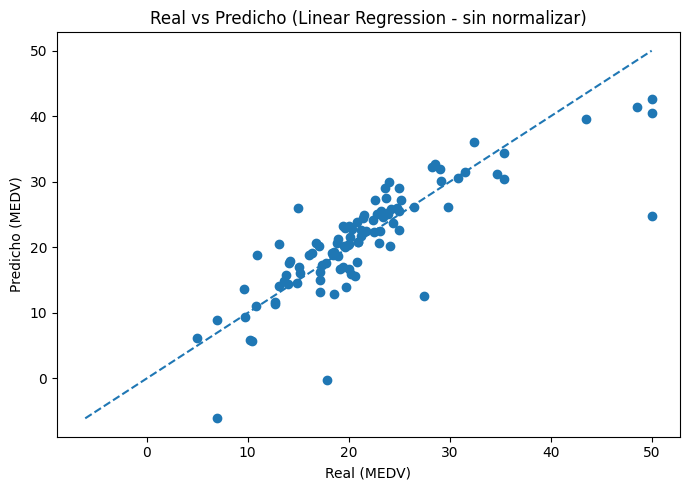

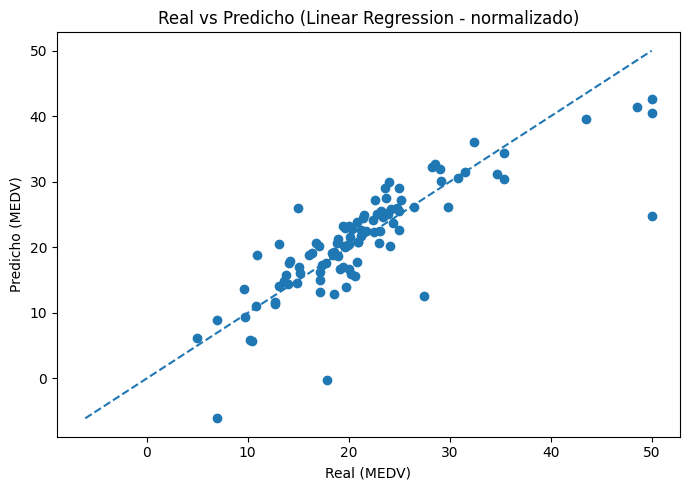


Primeras filas de la comparación:


,MEDV_real,Pred_sin_norm,Pred_norm
0,23.6,28.996724,28.996724
1,32.4,36.025565,36.025565
2,13.6,14.816944,14.816944
3,22.8,25.031979,25.031979
4,16.1,18.769880,18.769880
5,20.0,23.254429,23.254429
6,17.8,17.662538,17.662538
7,14.0,14.341190,14.341190
8,19.6,23.013207,23.013207
9,16.8,20.632456,20.632456


from matplotlib import pyplot as plt
_df_0['MEDV_real'].plot(kind='hist', bins=20, title='MEDV_real')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Pred_sin_norm'].plot(kind='hist', bins=20, title='Pred_sin_norm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pred_norm'].plot(kind='hist', bins=20, title='Pred_norm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='MEDV_real', y='Pred_sin_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Pred_sin_norm', y='Pred_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['MEDV_real'].plot(kind='line', figsize=(8, 4), title='MEDV_real')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Pred_sin_norm'].plot(kind='line', figsize=(8, 4), title='Pred_sin_norm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Pred_norm'].plot(kind='line', figsize=(8, 4), title='Pred_norm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
# ACTIVIDAD 4.1 - REGRESIÓN LINEAL + ANÁLISIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

plt.rcParams['figure.figsize'] = (9, 6)

# CARGA DEL DATASET
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
columnas = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD",
    "TAX","PTRATIO","B","LSTAT","MEDV"
]
df = pd.read_csv(url, sep=r"\s+", names=columnas)

print("Dimensiones:", df.shape)
display(df.head())

# ANÁLISIS RÁPIDO
print("\n--- ¿Hay datos nulos? ---")
print(df.isnull().sum())

print("\n--- Tipos de datos ---")
print(df.dtypes)

# Histogramas (pandas / matplotlib)
df.hist(bins=20, figsize=(15, 12))
plt.suptitle("Histogramas de los atributos", fontsize=16)
plt.show()

# MATRIZ DE CORRELACIÓN
corr = df.corr()
plt.figure(figsize=(12,10))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriz de correlación (visual)")
plt.tight_layout()
plt.show()

# Correlación con MEDV
corr_medv = corr["MEDV"].sort_values(ascending=False)
print("\n--- Correlación con MEDV ---")
display(corr_medv)

# DIVISIÓN TRAIN/TEST
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# split train/val (de train_full a train/val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

print(f"\nTamaños -> Train:{len(X_train)}, Val:{len(X_val)}, Test:{len(X_test)}")

# ---------------------------
# MODELO 1: Linear Regression SIN normalizar
# ---------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_val_lr = lr.predict(X_val)
r2_val_lr = r2_score(y_val, pred_val_lr)
rmse_val_lr = np.sqrt(mean_squared_error(y_val, pred_val_lr))

print("\nLinear Regression (sin normalizar) - VAL")
print(f"R2 = {r2_val_lr:.4f}, RMSE = {rmse_val_lr:.4f}")

# ---------------------------
# MODELO 2: Linear Regression CON MinMaxScaler
# ---------------------------
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

lr_s = LinearRegression()
lr_s.fit(X_train_s, y_train)

pred_val_lr_s = lr_s.predict(X_val_s)
r2_val_lr_s = r2_score(y_val, pred_val_lr_s)
rmse_val_lr_s = np.sqrt(mean_squared_error(y_val, pred_val_lr_s))

print("\nLinear Regression (normalizado MinMax) - VAL")
print(f"R2 = {r2_val_lr_s:.4f}, RMSE = {rmse_val_lr_s:.4f}")

# ---------------------------
# ENTRENAR EN TRAIN_FULL Y EVALUAR EN TEST
# (ambos casos: sin normalizar y normalizado)
# ---------------------------

# Sin normalizar
lr_final = LinearRegression()
lr_final.fit(X_train_full, y_train_full)
pred_test_lr = lr_final.predict(X_test)
r2_test_lr = r2_score(y_test, pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, pred_test_lr))

# Normalizado
sc_final = MinMaxScaler()
X_train_full_s = sc_final.fit_transform(X_train_full)
X_test_s = sc_final.transform(X_test)

lr_final_s = LinearRegression()
lr_final_s.fit(X_train_full_s, y_train_full)
pred_test_lr_s = lr_final_s.predict(X_test_s)
r2_test_lr_s = r2_score(y_test, pred_test_lr_s)
rmse_test_lr_s = np.sqrt(mean_squared_error(y_test, pred_test_lr_s))

print("\n--- MÉTRICAS EN TEST ---")
print(f"Sin normalizar -> R2={r2_test_lr:.4f}, RMSE={rmse_test_lr:.4f}")
print(f"Normalizado     -> R2={r2_test_lr_s:.4f}, RMSE={rmse_test_lr_s:.4f}")

# ---------------------------
# GRÁFICAS REAL VS PREDICHO (cada gráfica por separado)
# ---------------------------

# 1) Sin normalizar
plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_test_lr)
minv, maxv = min(y_test.min(), pred_test_lr.min()), max(y_test.max(), pred_test_lr.max())
plt.plot([minv, maxv], [minv, maxv], '--')
plt.title("Real vs Predicho (Linear Regression - sin normalizar)")
plt.xlabel("Real (MEDV)")
plt.ylabel("Predicho (MEDV)")
plt.tight_layout()
plt.show()

# 2) Normalizado
plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_test_lr_s)
minv, maxv = min(y_test.min(), pred_test_lr_s.min()), max(y_test.max(), pred_test_lr_s.max())
plt.plot([minv, maxv], [minv, maxv], '--')
plt.title("Real vs Predicho (Linear Regression - normalizado)")
plt.xlabel("Real (MEDV)")
plt.ylabel("Predicho (MEDV)")
plt.tight_layout()
plt.show()

# ---------------------------
# TABLA COMPARATIVA (primeras filas)
# ---------------------------
tabla = pd.DataFrame({
    "MEDV_real": y_test.values,
    "Pred_sin_norm": pred_test_lr,
    "Pred_norm": pred_test_lr_s
})

print("\nPrimeras filas de la comparación:")
display(tabla.head(12))
